Mujtaba Aljishi. ID# 201690160

# Homework #2

We would like to design a MLP neural network to classify points whether they are inside the blue shape
given below or not: Note that the coordinates of the points on the given shape are: (-8,0), (-4,4), (-4,-4),
(0,0), (4,4), (4,-4), (8,0).

![image.png](attachment:image.png)

i. Design an MLP to classify the given decision boundary, assuming simple perceptron: 𝑜𝑢𝑡𝑝𝑢𝑡 =
1 𝑖𝑓 Σ𝑖 𝑤𝑖𝑥𝑖 + 𝑏𝑖 ≥ 0. Clearly show the used weights and biases. (10 points)



we find the lines of this graph
![image.png](attachment:image.png)
here is a link for the image if it does not work
https://i.imgur.com/EtkXb7L.png

I also uploaded the img with the homework

We have two common lines.<br>

<b>Left graph:</b><br>

Points: (-8,0) & (-4, -4)<br>
x2 = ((-8- -4)/ (0-4)) x1 +c<br>
x2 = -x1 +c, we substitute by -8 for x1 and 0 for x2 we get 0 = 8 + c -> c = -8<br>
we get: x2 = -x1 -8 -> <br>
0 = -x1 -x2 -8<br>
we do the same thing to get the rest of equations.<br>
Points: (-8,0) & (-4, 4)<br>
x2 = x1 + 8 -><br>
0 = x1 -x2 +8<br>
Points: (-4, 4) & (0, 0)<br>
x2 = -x1 <br>
0 = -x1 -x2<br>
Points: (-4, -4) & (0, 0)<br>
x2 = x1<br>
0 = x1 -x2<br>

<b>right graph:</b><br>

Points: (8,0) & (4, -4)<br>
x2 = x1 -8<br>
0 = x1 -x2 -8<br>

Points: (8,0) & (4, 4)<br>
x2 = -x1 +8<br>
0 = -x2 -x1 +8<br>
Points: (4,4) & (0, 0)<br>
x2 = x1<br>
Points: (4, -4) & (0, 0)<br>
x2 = -x1<br>

<b> Common lines are 0 = -x1 -x2 and 0 = x1 -x2 </b><br>
Then we AND them. Since we have two common equation. So we have 6 perceptron at layer 2 and 2 in layer 3.<br>
now let’s represent these equations in the graph<br>

![image.png](attachment:image.png)
here is a link to the image if it does not work
https://i.imgur.com/SwON8vU.png

I also uploaded the img with the homework

As we can see when we identifiy the boundery, by drawing lines over it, of the shape we will have 8 boundery.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

ii. Model your designed MLP in (i) using the derived weights and biases. (5 points)

<b>We can easily simply represent our equations for the graph using these equation --> |x-4| + |y| = 4 and |x+4| + |y| = 4, but I will use our equations above

In [2]:
def sample_points(n):
    
    x1 = np.random.uniform(low=-10,high=10,size=n).reshape(-1,1) 
    x2 = np.random.uniform(low=-6,high=6,size=n).reshape(-1,1)
    #I first solve it using this equation that I came with then I used our above equations to solve it with.
    #If it is on the boundery of these equations --> |x-4| + |y| = 4 and |x+4| + |y| = 4, it gives us one
    #y1 = ((np.absolute(x1-4) + np.absolute(x2)<4) | (np.absolute(x1+4) + np.absolute(x2)<4) ).astype(int).reshape(-1)
    # if it is on any boundery of the two shapes, it gives us one.
    y1 = ( (((-x1 -x2)< 8 )& ((x2 +x1)< 0) & ((x2 -x1)< 8 )& ((x2 - x1)> 0)) | (((x2-x1)> -8 )& ((x2 +x1)> 0) & ((x2 +x1)< 8 )& ((x2 - x1)< 0)) ).astype(int).reshape(-1)
    x_simple = np.concatenate([x1,x2],axis=1)
    return x_simple,y1

iii. Generate a training set of 10,000 samples, validation test of 500 samples, and test set of 500
samples. The x-axis ranges from -10 to 10 and the y-axis ranges from -6 to 6. Your generated
samples should be within this boundary. (5 points)

In [3]:
# Generate the data
trainx,trainy = sample_points(10000)
valx,valy = sample_points(500)
testx,testy = sample_points(500)
print(trainx.shape,trainy.shape)

(10000, 2) (10000,)


iv. Test your model in (ii) using the generated training, validation, and test sets. You should get 100%
accuracy. Plotting the training set should show a figure similar to the one below. (5 points)

v. Build an MLP network with 2 inputs, a single hidden layer with 8 neurons, and 2 outputs using
ReLU activation function for the hidden layer. Train your network using SGD, with learning rate
= 0.01, for 10,000 iterations, and using nn.CrossEntropyLoss(). Report the training and validation
losses and training and validation accuracies. Also plot the classification results of the test samples.
You should get a figure similar the one shown below. (10 points)

In [4]:
def generate_single_hidden_MLP(n_hidden_neurons):
    return nn.Sequential(nn.Linear(2,n_hidden_neurons),nn.ReLU(),nn.Linear(n_hidden_neurons,2))
model1 = generate_single_hidden_MLP(8)

In [5]:
trainx = torch.from_numpy(trainx).float()
valx = torch.from_numpy(valx).float()
testx = torch.from_numpy(testx).float()
trainy = torch.from_numpy(trainy).long()
valy = torch.from_numpy(valy).long()
testy = torch.from_numpy(testy).long()

training

In [6]:
def training_routine(net,dataset,n_iters,gpu):
    # organize the data
    train_data,train_labels,val_data,val_labels = dataset
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
    
    # use the flag
    if gpu:
        train_data,train_labels = train_data.cuda(),train_labels.cuda()
        val_data,val_labels = val_data.cuda(),val_labels.cuda()
        net = net.cuda() # the network parameters also need to be on the gpu !
        print("Using GPU")
    else:
        print("Using CPU")
    for i in range(n_iters):
        # forward pass
        train_output = net(train_data)
        train_loss = criterion(train_output,train_labels)
        # backward pass and optimization
        train_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # Once every 100 iterations, print statistics
        if i%100==0:
            print("At iteration",i)
            # compute the accuracy of the prediction
            train_prediction = train_output.cpu().detach().argmax(dim=1)
            train_accuracy = (train_prediction.numpy()==train_labels.numpy()).mean() 
            # Now for the validation set
            val_output = net(val_data)
            val_loss = criterion(val_output,val_labels)
            # compute the accuracy of the prediction
            val_prediction = val_output.cpu().detach().argmax(dim=1)
            val_accuracy = (val_prediction.numpy()==val_labels.numpy()).mean() 
            print("Training loss :",train_loss.cpu().detach().numpy())
            print("Training accuracy :",train_accuracy)
            print("Validation loss :",val_loss.cpu().detach().numpy())
            print("Validation accuracy :",val_accuracy)
    
    net = net.cpu()

In [7]:
dataset = trainx,trainy,valx,valy

In [8]:
gpu = False
gpu = gpu and torch.cuda.is_available() # to know if you actually can use the GPU

training_routine(model1,dataset,10000,gpu)

Using CPU
At iteration 0
Training loss : 1.0454332
Training accuracy : 0.518
Validation loss : 0.98190755
Validation accuracy : 0.526
At iteration 100
Training loss : 0.47904745
Training accuracy : 0.7345
Validation loss : 0.50071234
Validation accuracy : 0.72
At iteration 200
Training loss : 0.4452275
Training accuracy : 0.7345
Validation loss : 0.47366884
Validation accuracy : 0.72
At iteration 300
Training loss : 0.42761514
Training accuracy : 0.7373
Validation loss : 0.45854422
Validation accuracy : 0.724
At iteration 400
Training loss : 0.41377765
Training accuracy : 0.7547
Validation loss : 0.4465746
Validation accuracy : 0.732
At iteration 500
Training loss : 0.40222642
Training accuracy : 0.7758
Validation loss : 0.43669343
Validation accuracy : 0.748
At iteration 600
Training loss : 0.39239943
Training accuracy : 0.7955
Validation loss : 0.4284069
Validation accuracy : 0.764
At iteration 700
Training loss : 0.38378432
Training accuracy : 0.813
Validation loss : 0.42155907
Vali

At iteration 6600
Training loss : 0.2622368
Training accuracy : 0.8987
Validation loss : 0.3121287
Validation accuracy : 0.872
At iteration 6700
Training loss : 0.26116574
Training accuracy : 0.8998
Validation loss : 0.310984
Validation accuracy : 0.872
At iteration 6800
Training loss : 0.2601114
Training accuracy : 0.9011
Validation loss : 0.30993775
Validation accuracy : 0.874
At iteration 6900
Training loss : 0.25907058
Training accuracy : 0.9016
Validation loss : 0.30895373
Validation accuracy : 0.876
At iteration 7000
Training loss : 0.25803402
Training accuracy : 0.9019
Validation loss : 0.3079189
Validation accuracy : 0.876
At iteration 7100
Training loss : 0.25699687
Training accuracy : 0.9024
Validation loss : 0.306918
Validation accuracy : 0.878
At iteration 7200
Training loss : 0.25598675
Training accuracy : 0.9027
Validation loss : 0.30592304
Validation accuracy : 0.878
At iteration 7300
Training loss : 0.25496888
Training accuracy : 0.9042
Validation loss : 0.3048499
Valid

plot

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl




def print_model(model,datapoints, title):
    out = model(datapoints).argmax(dim=1).detach().numpy()
    green = datapoints.numpy()[np.where(out==1)]
    red = datapoints.numpy()[np.where(out==0)]

    points1 = [[-8, 0], [-4, 4], [0, 0], [-4, -4],[-8,0]]
    line1 = plt.Polygon(points1, closed=True, fill=None, edgecolor='b')
    
    points2 = [[8, 0], [4, -4], [0, 0], [4, 4],[8,0]]
    line2 = plt.Polygon(points2, closed=True, fill=None, edgecolor='b')
        
    
    fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()
    plt.xlim(-10, 10)
    plt.ylim(-6, 6)
    plt.title(title)
    pos_values = plt.scatter(x=green[:,0],y=green[:,1], color='g',)
    neg_values = plt.scatter(x=red[:,0],y=red[:,1], color='r',)
    ax.title.set_text = title
    ax.add_artist(pos_values)
    ax.add_artist(neg_values)
    ax.add_patch(line1)
    ax.add_patch(line2)    

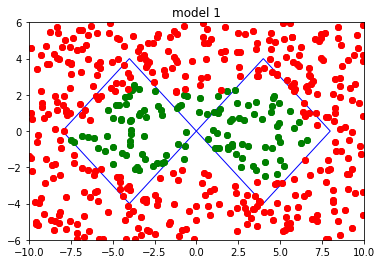

In [10]:
print_model(model1,testx,'model 1')

vi. Repeat step (v) using 50 neurons in the hidden layer. Compare the results you got with the model
in (v). Also plot the classification results of the test samples. (5 points)

In [11]:
model2 = generate_single_hidden_MLP(50)
dataset = trainx,trainy,valx,valy

gpu = False
gpu = gpu and torch.cuda.is_available() # to know if you actually can use the GPU

training_routine(model2,dataset,10000,gpu)

Using CPU
At iteration 0
Training loss : 0.59908676
Training accuracy : 0.6229
Validation loss : 0.56941503
Validation accuracy : 0.662
At iteration 100
Training loss : 0.4328445
Training accuracy : 0.7425
Validation loss : 0.43790978
Validation accuracy : 0.732
At iteration 200
Training loss : 0.40569293
Training accuracy : 0.7549
Validation loss : 0.41204864
Validation accuracy : 0.752
At iteration 300
Training loss : 0.3859594
Training accuracy : 0.7767
Validation loss : 0.3927233
Validation accuracy : 0.764
At iteration 400
Training loss : 0.37013617
Training accuracy : 0.7981
Validation loss : 0.37701806
Validation accuracy : 0.792
At iteration 500
Training loss : 0.35701284
Training accuracy : 0.8123
Validation loss : 0.36381564
Validation accuracy : 0.81
At iteration 600
Training loss : 0.34586972
Training accuracy : 0.8249
Validation loss : 0.35253105
Validation accuracy : 0.824
At iteration 700
Training loss : 0.33626652
Training accuracy : 0.8378
Validation loss : 0.34276885


At iteration 6400
Training loss : 0.19390821
Training accuracy : 0.9316
Validation loss : 0.19886431
Validation accuracy : 0.924
At iteration 6500
Training loss : 0.192623
Training accuracy : 0.9321
Validation loss : 0.19756566
Validation accuracy : 0.924
At iteration 6600
Training loss : 0.19133966
Training accuracy : 0.9326
Validation loss : 0.19627789
Validation accuracy : 0.924
At iteration 6700
Training loss : 0.19005743
Training accuracy : 0.933
Validation loss : 0.1950002
Validation accuracy : 0.924
At iteration 6800
Training loss : 0.18877898
Training accuracy : 0.9334
Validation loss : 0.19372691
Validation accuracy : 0.926
At iteration 6900
Training loss : 0.18750453
Training accuracy : 0.9337
Validation loss : 0.19245622
Validation accuracy : 0.926
At iteration 7000
Training loss : 0.18622984
Training accuracy : 0.9342
Validation loss : 0.1912079
Validation accuracy : 0.926
At iteration 7100
Training loss : 0.18495344
Training accuracy : 0.9349
Validation loss : 0.1899637
Va

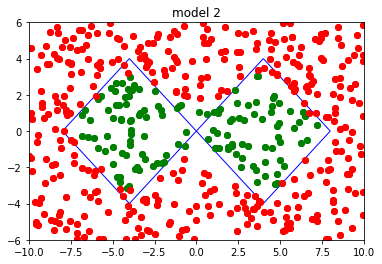

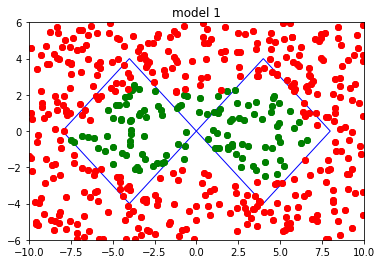

In [12]:
print_model(model2,testx,'model 2')
print_model(model1,testx,'model 1')

In model 1 we concluded in final iteration with this stat:<br>

Training loss : 0.22863474<br>
Training accuracy : 0.9092<br>
Validation loss : 0.23296271<br>
Validation accuracy : 0.904<br>

In model 2 we concluded in final iteration with this stat:<br>

Training loss : 0.14830276<br>
Training accuracy : 0.9525<br>
Validation loss : 0.15974909<br>
Validation accuracy : 0.948<br>

As you can see the training and validation accuracy are more accurate as we add more neurons for training.<br>
The model becomes more accurate.<br>

vii. Build an MLP network with 2 inputs, first hidden layer with 8 neurons, second hidden layer of 2
neurons and 2 outputs using ReLU activation function for the hidden layers. Train your network
using SGD, with learning rate = 0.01, for 10,000 iterations, and using nn.CrossEntropyLoss().
Report the training and validation losses and training and validation accuracies. Also plot the
classification results of the test samples. Compare the obtained results against those obtained in (v)
and (vi). (10 points)

In [13]:
def generate_double_hidden_MLP(n_hidden_neurons):
    return nn.Sequential(nn.Linear(2,n_hidden_neurons),nn.ReLU(),nn.Linear(n_hidden_neurons,n_hidden_neurons),nn.ReLU(),nn.Linear(n_hidden_neurons,2))

In [14]:
model3 = generate_double_hidden_MLP(8)

In [15]:
dataset = trainx,trainy,valx,valy

gpu = True
gpu = gpu and torch.cuda.is_available() # to know if you actually can use the GPU

training_routine(model3,dataset,10000,gpu)

Using GPU
At iteration 0


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
print_model(model3,testx,'model 3')
print_model(model2,testx,'model 2')


In model 3 we concluded in final iteration with this stat:<br>

Training loss : 0.108602695<br>
Training accuracy : 0.9678<br>
Validation loss : 0.102672964<br>
Validation accuracy : 0.974<br>

In model 2 we concluded in final iteration with this stat:<br>

Training loss : 0.14830276<br>
Training accuracy : 0.9525<br>
Validation loss : 0.15974909<br>
Validation accuracy : 0.948<br>

As you can see the training and validation accuracy are more accurate as we add more hidden layers for training.<br>
The model becomes more accurate even with less neurons.<br>